# <font color='purple'> 🏨 Hotel Reservation | RandForest - KNN - LogicarReg - CatBoost + EDA. </font>


# <font color='black'> About. </font>

#### The aim of the project is to predict hotel reservation cancellations using data from the Hotel Reservations Dataset on the Kaggle platform. Laptop basic data analysis (EDA) involving descriptive statistics and plotting of graphs, trying different machine learning models for booking cancellation prediction, inferring the resulting scoring models, EDA and graphs, and provide recommendations to optimize the booking process and reduce future booking cancellations.

### Load the standard set of libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# EDA

### Create a variable df where our "Hotel Reservations Dataset" will be located

In [2]:
df = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv')

In [3]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Let's see what data types 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Estimate primary statistics 

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Let's look at the categorical data

Text(0, 0.5, 'Counting values')

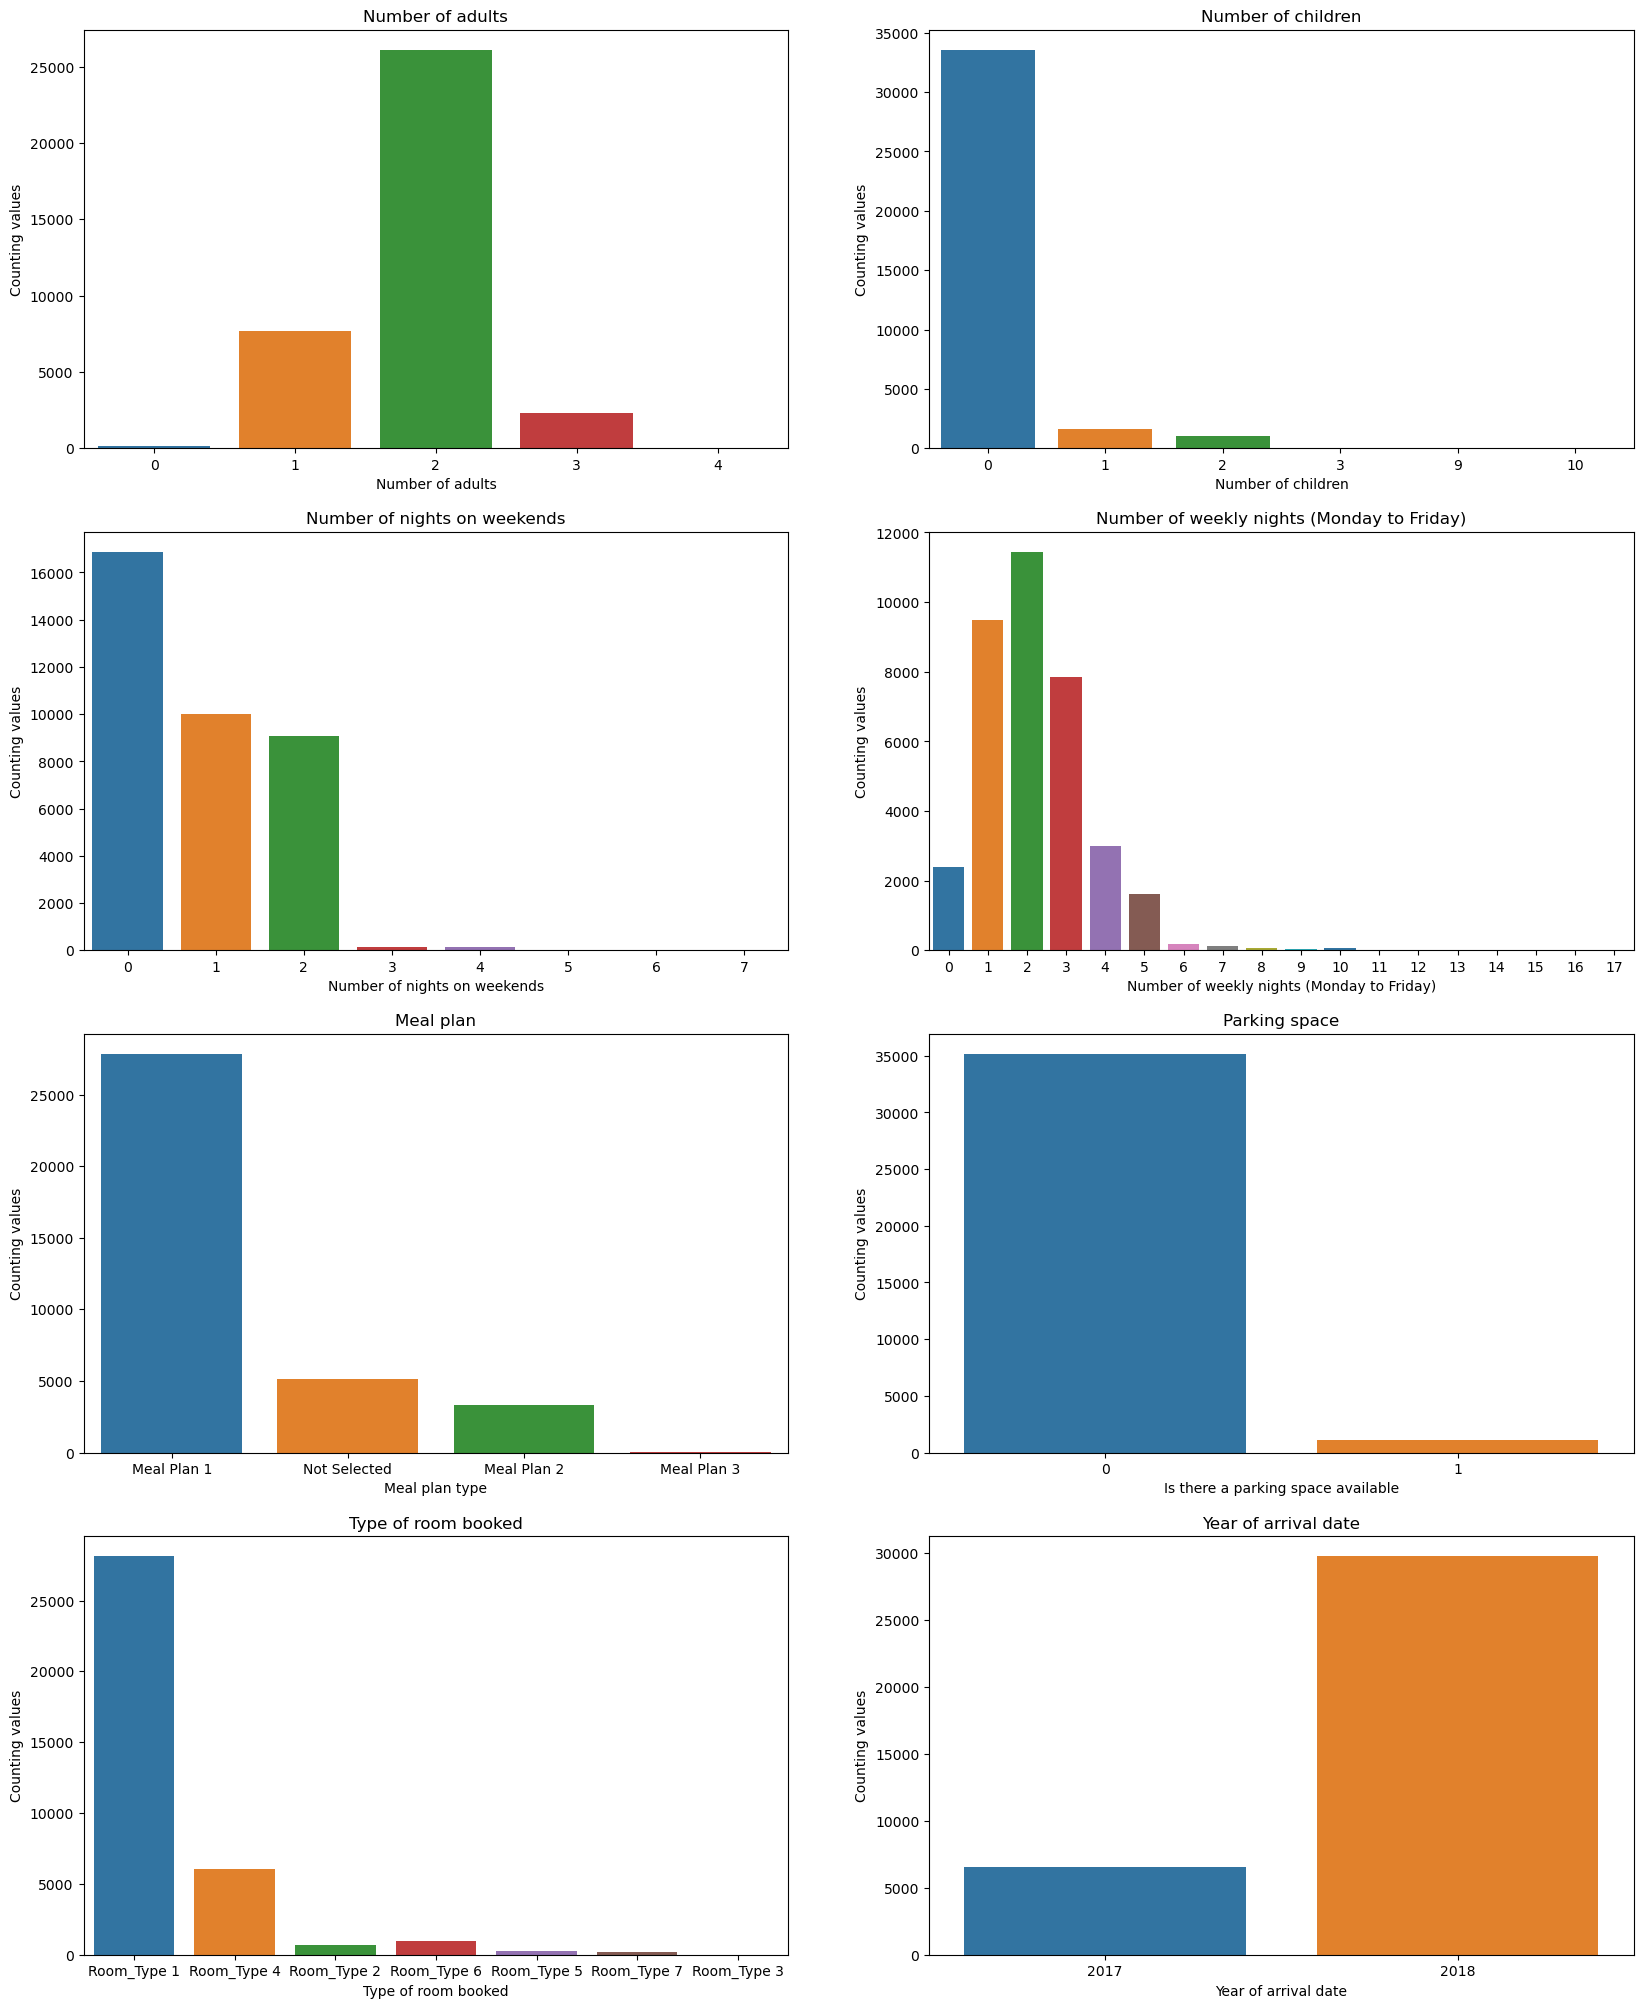

In [6]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Number of adults')
sns.countplot(x = 'no_of_adults', palette = 'tab10', data = df)
plt.xlabel('Number of adults')
plt.ylabel('Counting values')

plt.subplot(4,2,2)
plt.gca().set_title('Number of children')
sns.countplot(x = 'no_of_children', palette = 'tab10', data = df)
plt.xlabel('Number of children')
plt.ylabel('Counting values')

plt.subplot(4,2,3)
plt.gca().set_title('Number of nights on weekends')
sns.countplot(x = 'no_of_weekend_nights', palette = 'tab10', data = df)
plt.xlabel('Number of nights on weekends')
plt.ylabel('Counting values')

plt.subplot(4,2,4)
plt.gca().set_title('Number of weekly nights (Monday to Friday)')
sns.countplot(x = 'no_of_week_nights', palette = 'tab10', data = df)
plt.xlabel('Number of weekly nights (Monday to Friday)')
plt.ylabel('Counting values')

plt.subplot(4,2,5)
plt.gca().set_title('Meal plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'tab10', data = df)
plt.xlabel('Meal plan type')
plt.ylabel('Counting values')

plt.subplot(4,2,6)
plt.gca().set_title('Parking space')
sns.countplot(x = 'required_car_parking_space', palette = 'tab10', data = df)
plt.xlabel('Is there a parking space available')
plt.ylabel('Counting values')

plt.subplot(4,2,7)
plt.gca().set_title('Type of room booked')
sns.countplot(x = 'room_type_reserved', palette = 'tab10', data = df)
plt.xlabel('Type of room booked')
plt.ylabel('Counting values')

plt.subplot(4,2,8)
plt.gca().set_title('Year of arrival date')
sns.countplot(x = 'arrival_year', palette = 'tab10', data = df)
plt.xlabel('Year of arrival date')
plt.ylabel('Counting values')

#### room type 1 is taken the most, much more than all other room types, we can say that the average price of room type 1 -- 103.423539 euros or 103.42 euros * 80 rubles/euro = 8273.6 rubles.
#### We have the most values for 2018
#### No one practically takes a parking space 
#### Among meal plans they choose 1 or no meal plan, even less often 2 and not at all 3. 
#### Among the number of weekend and weekly nights, nothing unusual, i.e. most people take a hotel for one week plus one couple of weekends. 
#### Among those who visit, they are most likely to be M+W couples without children (assumption).

### See if there are any missing values NaN / null etc

Text(50.722222222222214, 0.5, 'Values in dataset')

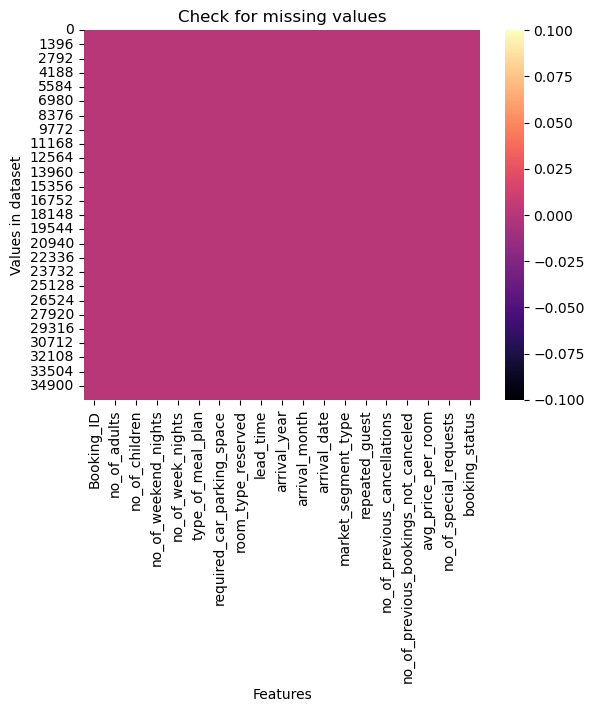

In [7]:
sns.heatmap(df.isnull(), cmap = 'magma')
plt.gca().set_title('Check for missing values')
plt.xlabel('Features')
plt.ylabel('Values in dataset')

#### You can clearly see that missing values are not observed in the dataset - which is a good thing

### Let's see if we can convert the data to a numeric equivalent

In [8]:
#Substitute as follows: Not Selected - 0, Meal Plan 1 - 1, Meal Plan 2 - 2, Meal Plan 3 - 3
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [9]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

In [10]:
#The replacement here is self-explanatory, Room_Type 1 is 1, Room_Type 2 is 2, and so on....
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [11]:
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

In [12]:
#I think we can replace here too, let Offline - 0, Online - 1, Corporate - 2, Aviation - 3, Complementary - 4
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [13]:
df['market_segment_type'] = df['market_segment_type'].map({'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})

In [14]:
#Obviously here you can replace no Not_Canceled with 0 and Canceled with 1
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [15]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

##### I also think we should remove Booking_ID, because we have indexes, and it doesn't give any information.

In [16]:
df = df.drop('Booking_ID', axis=1)

In [17]:
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


### Check with NaN just in case again ###

Text(50.722222222222214, 0.5, 'Values in dataset')

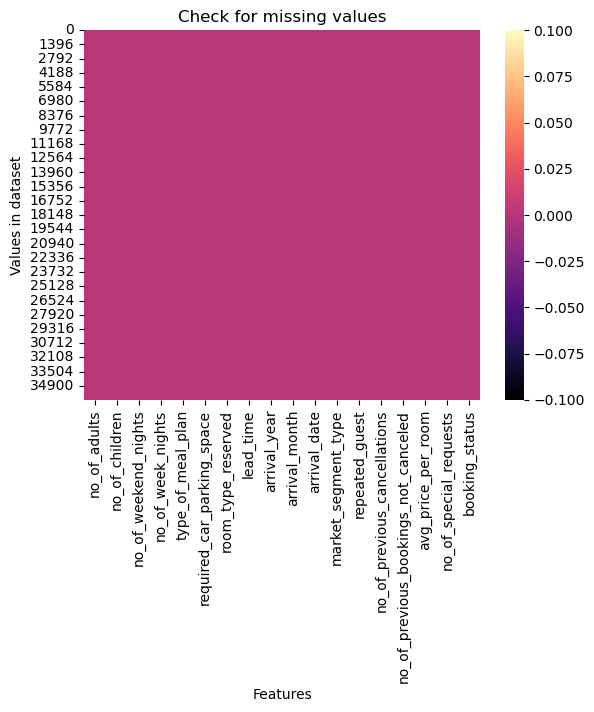

In [18]:
sns.heatmap(df.isnull(), cmap = 'magma')
plt.gca().set_title('Check for missing values')
plt.xlabel('Features')
plt.ylabel('Values in dataset')

### Let's see which months have the most bookings and which bookings are popular in certain months

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-3.930555555555541, 0.5, 'Number of bookings')

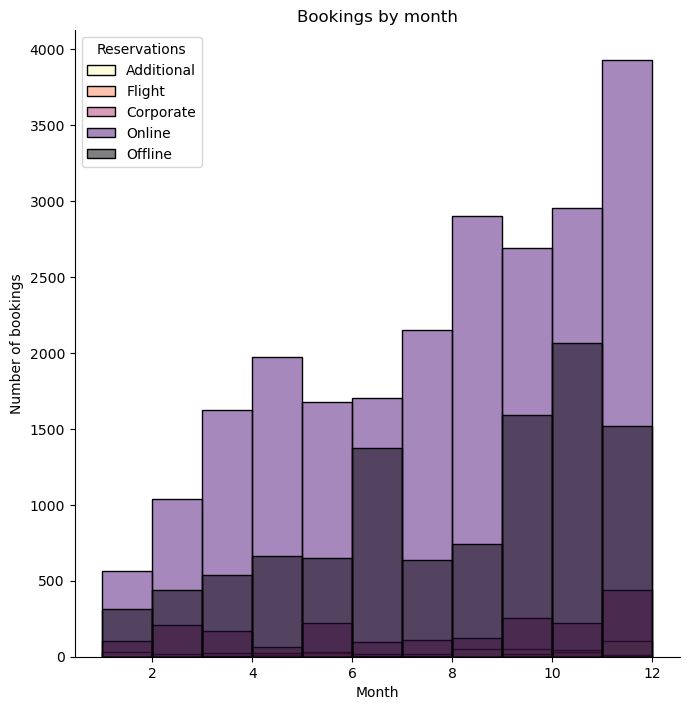

In [19]:
sns.displot(df, x='arrival_month', binwidth=1, height=7, palette='magma', hue='market_segment_type', legend = False)
plt.gca().set_title('Bookings by month')
plt.legend(title= 'Reservations',
           labels=['Additional','Flight','Corporate','Online','Offline'])
plt.xlabel('Month')
plt.ylabel('Number of bookings')

#### The number of bookings increases with the arrival of winter, it turns out that from August to December are the most 'Booked' months. Which is logical, since summer is leaving by August - you need to plan/book your next vacation.

### Calculate Cancellation Rate

In [20]:
value = df["booking_status"].value_counts()
rate = value.sum()
value*100/rate

0    67.236389
1    32.763611
Name: booking_status, dtype: float64

In [21]:
#{'Not_Canceled': 0, 'Canceled': 1}

#### Let's see the correlation between features, maybe we can find interesting insights and visualize them.

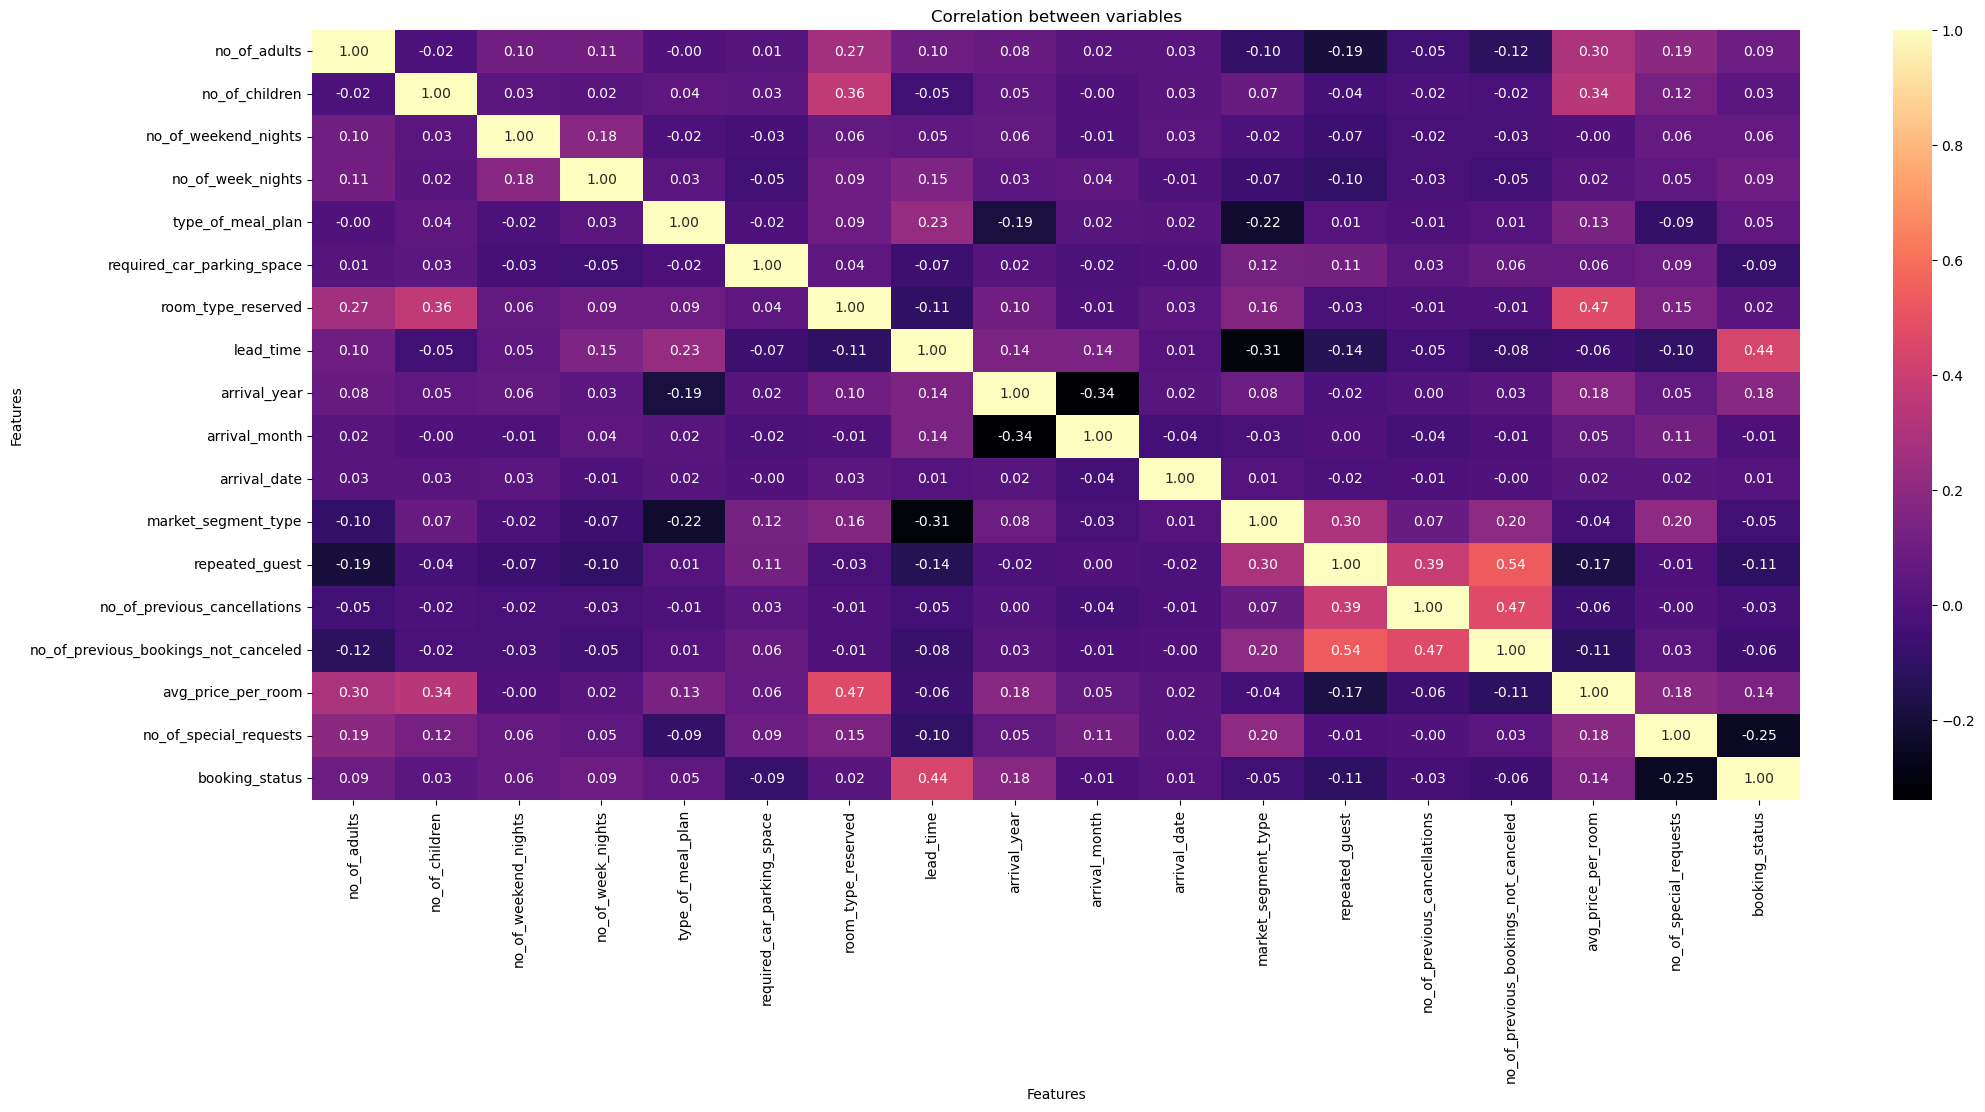

In [22]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [23]:
#where correlation is seen
#lead_time / booking_status
#no_of_previous_cancellations / repeated_guest
#market_segment_type / repeated_guest
#no_of_previous_bookings_not_canceled / repeated_guest

#### There is a relationship between "number of days between booking date and hotel arrival date" and "whether the booking was canceled or not". #lead_time / booking_status

Text(0, 0.5, 'Days between booking and arrival')

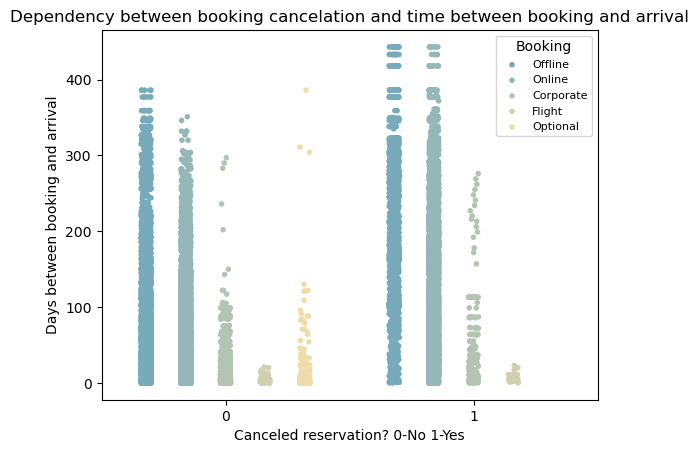

In [24]:
stp = sns.stripplot(data=df, x="booking_status", y="lead_time", hue="market_segment_type", jitter = True, dodge = True, palette = 'blend:#7AB,#EDA', size = 4)
plt.gca().set_title('Dependency between booking cancelation and time between booking and arrival')
labels_dict = {0:'Offline', 1:'Online', 2:'Corporate', 3:'Flight', 4:'Optional'}
plt.legend(loc='upper right', title='Booking',labels=labels_dict.values(), prop={'size': 8})
stp.set_xlabel('Canceled reservation? 0-No 1-Yes')
stp.set_ylabel('Days between booking and arrival')

### Offline reservations are more reliable, in that they are less likely to be canceled at a distance than online reservations. Another surprising thing is that it doesn't really matter how many days elapse between the booking date and the arrival date, i.e. it has almost no effect on whether the reservation is canceled. Although it would seem that the more days before arrival, the more likely that the reservation will be canceled, since different things can happen in life (plans can change, etc.), but as we can see, it basically has no effect. 

## Since we took the time between booking and arrival, it's certainly interesting to see how that affects the price of the room

Text(37.597222222222214, 0.5, 'Average price per room')

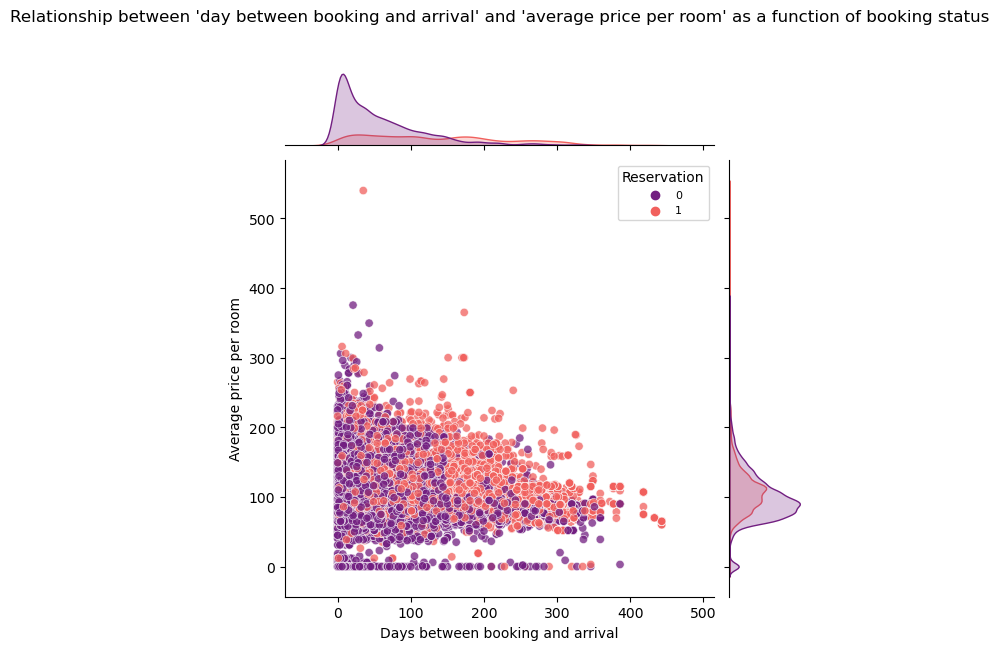

In [25]:
jnt = sns.jointplot(data=df, x='lead_time', y='avg_price_per_room', 
              hue='booking_status', alpha=0.75, palette = 'magma')
plt.gca().set_title('Relationship between \'day between booking and arrival\' and \'average price per room\' as a function of booking status', y=1.3)
plt.legend(loc='upper right', title='Reservation', prop={'size': 8})
jnt.ax_joint.set_xlabel('Days between booking and arrival')
jnt.ax_joint.set_ylabel('Average price per room')


### As mentioned above, around the 100 euro mark is where the most room bookings are made. At the same time, obviously more cancellations start around one hundred days and one hundred euros (0-no , yes-1). So we can say that there is a correlation between how expensive a room is and the days between booking and arrival. That is, the more expensive the room and the more days between booking and arrival, the more likely it is to be canceled.

#### I think it's also interesting to look at #no_of_previous_bookings_not_canceled / repeated_guest, so let's try to plot a graph and see what correlates where.

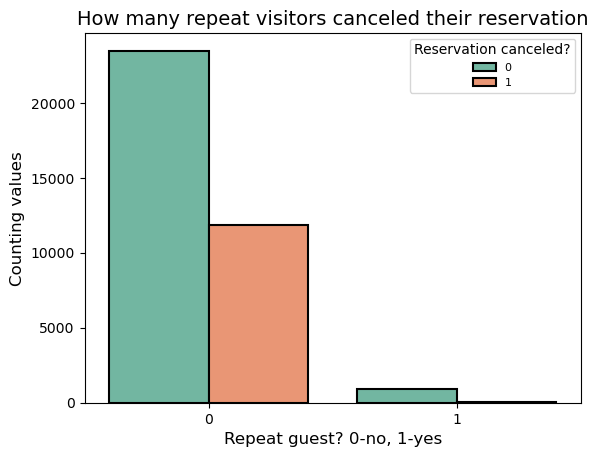

In [26]:
ax = sns.countplot(x="repeated_guest", hue="booking_status", data=df, palette="Set2", edgecolor='black', linewidth=1.5)

ax.set_xlabel('Repeat guest? 0-no, 1-yes', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('How many repeat visitors canceled their reservation', fontsize=14)
plt.legend(loc='upper right', title='Reservation canceled?', prop={'size': 8})

plt.show()

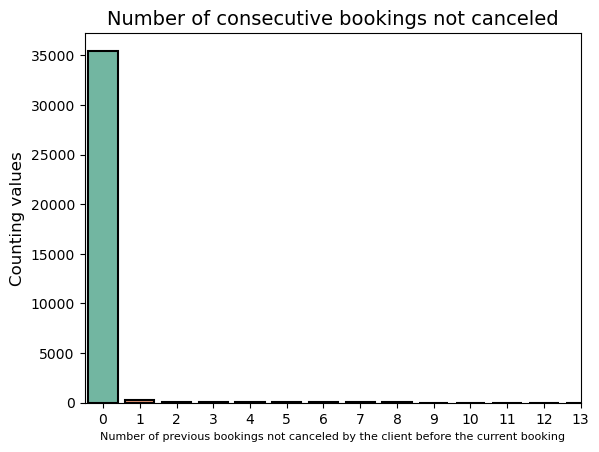

In [27]:
ax = sns.countplot(x="no_of_previous_bookings_not_canceled", data=df, palette="Set2", edgecolor='black', linewidth=1.5)
ax.set_xlim(right=13) 

ax.set_xlabel('Number of previous bookings not canceled by the client before the current booking', fontsize=8)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('Number of consecutive bookings not canceled', fontsize=14)

plt.show()

#### When visiting a hotel again, reservations are canceled much less often. Very few "successful" bookings are made in a row by a single customer, which can speak of their loyalty and trust in the brand. 

# Models

### First, let's prepare the data 

In [28]:
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


#### I think arrival_year arrival_date should be removed, leaving only months

In [29]:
df = df.drop(['arrival_year','arrival_date'], axis=1)

### Import library to split into test and training dates + metrics + remove warnings

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [31]:
X = df[['no_of_adults','no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',	'required_car_parking_space', 'room_type_reserved',	'lead_time', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']] 
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Let's start simple with logistic regression 

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logical = LogisticRegression()
logical.fit(X_train,y_train)

LogisticRegression()

In [34]:
logical_predict = logical.predict(X_test)

### Let's make a table with the results of the predictions for clarity

In [35]:
acc_lr = accuracy_score(y_test,logical_predict)
f1_lr = f1_score(y_test,logical_predict)
prec_lr = precision_score(y_test,logical_predict)
rec_lr = recall_score(y_test,logical_predict)
results_lr = pd.DataFrame([['Logistic regression', acc_lr, f1_lr, prec_lr, rec_lr]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_lr

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic regression,0.786216,0.635915,0.708791,0.576628


##### Accuracy Score - shows how often the model correctly predicts the target variable (in this case, a successfully booked room).  The metric can be useful if we want to evaluate how well the model performs on the total number of predictions.

##### F1 Score is a balanced metric that considers both accuracy and completeness. Makes a trade-off between accuracy and completeness to get a more objective assessment of the model's performance.

##### Precision - shows how many of the predicted positive outcomes are actually positive. Such a metric can be useful if we want to evaluate how accurately the model predicts successful bookings.

##### Recall - shows how many of the positive outcomes were correctly identified. This metric can be useful if we want to evaluate how well the model finds successful bookings.
#### Conventionally speaking, if it is important for us to minimize the number of false positives (when the model predicts a successful booking but it actually didn't happen), then we can focus on Precision. If our goal is to maximize the number of successful bookings, then Recall will be most important.

#### 78% not bad, though on f1 63%, but in general more than 50%, which is already pleasing

### Try the knn

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [38]:
acc_knn = accuracy_score(y_test,knn_predict)
f1_knn = f1_score(y_test,knn_predict)
prec_knn = precision_score(y_test,knn_predict)
rec_knn = recall_score(y_test,knn_predict)
results_knn = pd.DataFrame([['KNN', acc_knn, f1_knn, prec_knn, rec_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.81144,0.689373,0.738686,0.646232


### Already better 81% acc and f1 also 68%

### I think we should try a random forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
forest = RandomForestClassifier(random_state=42).fit(X_train, y_train)
forest_predict = forest.predict(X_test)

In [41]:
acc_rf = accuracy_score(y_test,forest_predict)
f1_rf = f1_score(y_test,forest_predict)
prec_rf = precision_score(y_test,forest_predict)
rec_rf = recall_score(y_test,forest_predict)
results_rf = pd.DataFrame([['Random forest', acc_rf, f1_rf, prec_rf, rec_rf]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random forest,0.898691,0.836848,0.874304,0.802469


#### Surprisingly the forest performs the best, 89% fss and 83 f1

### Try catboost (never used it before)

In [42]:
from catboost import CatBoostClassifier

In [43]:
cat = CatBoostClassifier(random_state=0,metric_period=100).fit(X_train,y_train)
cat_predict = cat.predict(X_test)

Learning rate set to 0.038385
0:	learn: 0.6640990	total: 62.6ms	remaining: 1m 2s
100:	learn: 0.3469206	total: 702ms	remaining: 6.25s
200:	learn: 0.3168179	total: 1.32s	remaining: 5.24s
300:	learn: 0.2967594	total: 1.93s	remaining: 4.49s
400:	learn: 0.2817830	total: 2.55s	remaining: 3.81s
500:	learn: 0.2707732	total: 3.17s	remaining: 3.15s
600:	learn: 0.2611474	total: 3.78s	remaining: 2.51s
700:	learn: 0.2538847	total: 4.4s	remaining: 1.88s
800:	learn: 0.2467891	total: 5.02s	remaining: 1.25s
900:	learn: 0.2399843	total: 5.64s	remaining: 620ms
999:	learn: 0.2337275	total: 6.26s	remaining: 0us


In [44]:
acc_cat = accuracy_score(y_test,cat_predict)
f1_cat = f1_score(y_test,cat_predict)
prec_cat = precision_score(y_test,cat_predict)
rec_cat = recall_score(y_test,cat_predict)
results_cat = pd.DataFrame([['CatBoost Classifier', acc_cat, f1_cat, prec_cat, rec_cat]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_cat

,Model,Accuracy Score,F1 score,Precision,Recall
0,CatBoost Classifier,0.890489,0.82224,0.866541,0.782248


#### It'll be worse than random woods, but still a good result.

#### Let's try to improve the performance of the random forest, since it has shown the best metrics.
#### I think we should try to increase the number of trees in the forest.
#### and maybe also the maximum depth of trees.

In [45]:
#forest_second_try = RandomForestClassifier(random_state=42, n_estimators=175, max_depth = 2).fit(X_train, y_train)
#forest_predict = forest_second_try.predict(X_test)

### After reading about hyperparameters I learned that there are models that look for these parameters, so now I'm going to try to use it

In [46]:
from sklearn.model_selection import GridSearchCV

forest_param = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(forest_param, parametrs, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)


print(grid.best_estimator_)

### outputs RandomForestClassifier(max_depth=11, n_estimators=50) after 3 minutes of waiting. Let's check them now.

In [47]:
forest_second_try = RandomForestClassifier(random_state=42, max_depth=11, n_estimators=50).fit(X_train, y_train)
forest_predict_second = forest_second_try.predict(X_test)

In [48]:
acc_rf_2 = accuracy_score(y_test,forest_predict_second)
f1_rf_2 = f1_score(y_test,forest_predict_second)
prec_rf_2 = precision_score(y_test,forest_predict_second)
rec_rf_2 = recall_score(y_test,forest_predict_second)
results_rf_2 = pd.DataFrame([['Random_forest_2', acc_rf_2, f1_rf_2, prec_rf_2, rec_rf_2]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf_2

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random_forest_2,0.877188,0.791822,0.877525,0.721371


### This is how it turned out, maybe the model overtrained on the test data, let's try to reduce the depth of trees (max_depth) or increase the number of objects needed to split a node (min_samples_split)

In [49]:
forest_third_try = RandomForestClassifier(random_state=42, max_depth=6, n_estimators=50, min_samples_split = 8).fit(X_train, y_train)
forest_predict_third = forest_third_try.predict(X_test)

In [50]:
acc_rf_3 = accuracy_score(y_test,forest_predict_third)
f1_rf_3 = f1_score(y_test,forest_predict_third)
prec_rf_3 = precision_score(y_test,forest_predict_third)
rec_rf_3 = recall_score(y_test,forest_predict_third)
results_rf_3 = pd.DataFrame([['Random_forest_3', acc_rf_3, f1_rf_3, prec_rf_3, rec_rf_3]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf_3

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random_forest_3,0.811096,0.621357,0.885085,0.478714


### Useless, let's try another method of searching for hyperparameters RandomizedSearchCV

In [51]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
param_dist = {
    "n_estimators": [10, 50, 100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=100,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=42
)
random_search.fit(X_train, y_train)


print("Best model:\n", random_search.best_estimator_)
print("Best score:\n", random_search.best_score_)

### So, the output is like this - Best model:
### RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
### n_estimators=200)
### Best score:
### 0.8889960946473696
### Check

In [52]:
forest_fourth_try = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200).fit(X_train, y_train)
forest_predict_fourth = forest_fourth_try.predict(X_test)

In [53]:
acc_rf_4 = accuracy_score(y_test,forest_predict_fourth)
f1_rf_4 = f1_score(y_test,forest_predict_fourth)
prec_rf_4 = precision_score(y_test,forest_predict_fourth)
rec_rf_4 = recall_score(y_test,forest_predict_fourth)
results_rf_4 = pd.DataFrame([['Random_forest_4', acc_rf_4, f1_rf_4, prec_rf_4, rec_rf_4]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf_4

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random_forest_4,0.9,0.83804,0.881014,0.799063


### Looks like a success! 0.9 acc 
### Let's compare all the results

# Results

In [54]:
results = pd.concat([results_rf_4, results_rf_3, results_rf_2, results_cat, results_rf, results_knn, results_lr])
results_sorted = results.sort_values(by='Accuracy Score', ascending=False)
results_sorted

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random_forest_4,0.900000,0.838040,0.881014,0.799063
0,Random forest,0.898691,0.836848,0.874304,0.802469
0,CatBoost Classifier,0.890489,0.822240,0.866541,0.782248
0,Random_forest_2,0.877188,0.791822,0.877525,0.721371
0,KNN,0.811440,0.689373,0.738686,0.646232
0,Random_forest_3,0.811096,0.621357,0.885085,0.478714
0,Logistic regression,0.786216,0.635915,0.708791,0.576628


# <font color='purple'> That's it. Thank you for reading my project! </font>